# Data Gathering, Defining Stakeholders and KPIs

## Data Loading

In [27]:
import pandas as pd
insurance = pd.read_csv('insurance.csv')
insurance.sample(5, random_state=111)

,age,sex,bmi,children,smoker,region,charges
1000,30,male,22.99,2,yes,northwest,17361.7661
53,36,male,34.43,0,yes,southeast,37742.5757
432,42,male,26.90,0,no,southwest,5969.7230
162,54,male,39.60,1,no,southwest,10450.5520
1020,51,male,37.00,0,no,southwest,8798.5930


## Exploratory Data Analysis (EDA)  

### Data Information  

In [28]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Data Description

In [29]:
print(insurance.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


### Data visualization  
#### Distribution of the features and target

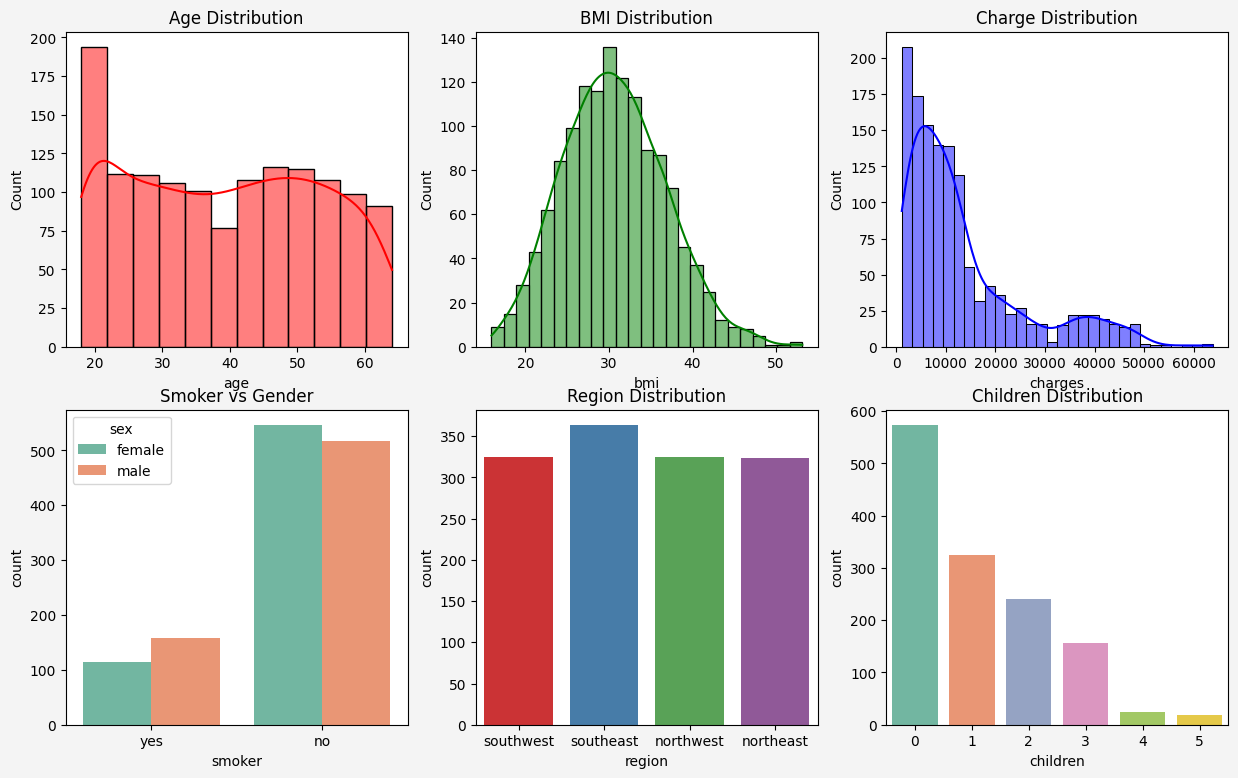

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 9))

sns.histplot(insurance['age'], color='red', kde=True,
             ax=axes[0, 0]).set_title('Age Distribution')

sns.histplot(insurance['bmi'], color='green', kde=True,
             ax=axes[0, 1]).set_title('BMI Distribution')

sns.histplot(insurance['charges'], color='blue', kde=True,
             ax=axes[0, 2]).set_title('Charge Distribution')

sns.countplot(x='smoker', data=insurance, hue='sex',
              palette='Set2', ax=axes[1, 0]).set_title('Smoker vs Gender')

sns.countplot(x=insurance['region'], hue=insurance['region'],
              palette='Set1', ax=axes[1, 1]).set_title('Region Distribution')

sns.countplot(x=insurance['children'], hue=insurance['children'], legend=False,
              palette='Set2', ax=axes[1, 2]).set_title('Children Distribution')

plt.gcf().patch.set_facecolor('#f4f4f4')

#### Relationship of the features and target

/var/folders/53/8y5n2fl55p3g3r5_pk9yfwk40000gn/T/ipykernel_24363/3642178304.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_yticklabels(['0k', '10k', '20k', '30k', '40k', '50k', '60k', '65k'])
/var/folders/53/8y5n2fl55p3g3r5_pk9yfwk40000gn/T/ipykernel_24363/3642178304.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_yticklabels(
/var/folders/53/8y5n2fl55p3g3r5_pk9yfwk40000gn/T/ipykernel_24363/3642178304.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_yticklabels(


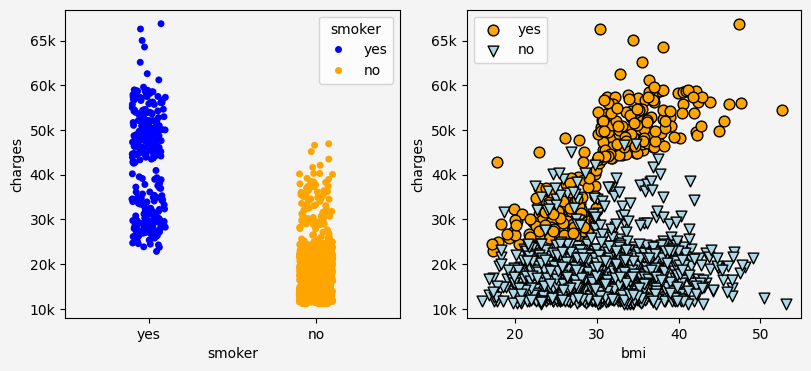

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(9.5, 4))
g = sns.stripplot(data=insurance, x='smoker', y='charges', hue='smoker', palette=[
                  'blue', 'orange'], legend=True, ax=axes[0])
g.set_yticklabels(['0k', '10k', '20k', '30k', '40k', '50k', '60k', '65k'])

axes[1].scatter(insurance.loc[insurance.smoker == 'yes'].bmi,
                insurance.loc[insurance.smoker == 'yes'].charges, label="yes", marker='o',
                s=60, edgecolors='black', c='orange'
                )
axes[1].set_yticklabels(
    ['0k', '10k', '20k', '30k', '40k', '50k', '60k', '65k'])

axes[1].scatter(insurance.loc[insurance.smoker == 'no'].bmi,
                insurance.loc[insurance.smoker == 'no'].charges, label="no", marker='v',
                s=60, edgecolors='black', c='lightblue'
                )
axes[1].set_yticklabels(
    ['0k', '10k', '20k', '30k', '40k', '50k', '60k', '65k'])

axes[1].set_xlabel('bmi')
axes[1].set_ylabel('charges')
axes[1].legend()

for ax in axes:
    ax.set_facecolor('#f4f4f4')
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

Clearly from the plots above we can see that the somoking status has effect on the insurance charges in relation with bmi

/var/folders/53/8y5n2fl55p3g3r5_pk9yfwk40000gn/T/ipykernel_24363/3109813868.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g1.set_xticklabels(['SW', 'SE', 'NW', 'NE'])
/var/folders/53/8y5n2fl55p3g3r5_pk9yfwk40000gn/T/ipykernel_24363/3109813868.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g1.set_yticklabels(['0k', '10k', '20k', '30k', '40k', '50k', '60k', '65k'])
/var/folders/53/8y5n2fl55p3g3r5_pk9yfwk40000gn/T/ipykernel_24363/3109813868.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g2.set_yticklabels(['0k', '10k', '20k', '30k', '40k', '50k', '60k', '65k'])


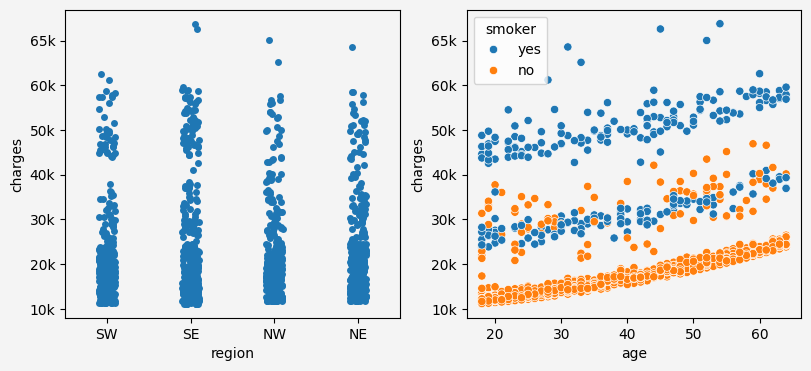

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(9.5, 4))

g1 = sns.stripplot(x='region', y='charges', data=insurance, ax=axes[0])
g1.set_xticklabels(['SW', 'SE', 'NW', 'NE'])
g1.set_yticklabels(['0k', '10k', '20k', '30k', '40k', '50k', '60k', '65k'])
g2 = sns.scatterplot(x='age', y='charges', data=insurance,
                     hue='smoker', ax=axes[1])
g2.set_yticklabels(['0k', '10k', '20k', '30k', '40k', '50k', '60k', '65k'])
for ax in axes:
    ax.set_facecolor('#f4f4f4')
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

/var/folders/53/8y5n2fl55p3g3r5_pk9yfwk40000gn/T/ipykernel_24363/2147984023.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g1.set_yticklabels(['0k', '10k', '20k', '30k', '40k', '50k', '60k', '65k'])
/var/folders/53/8y5n2fl55p3g3r5_pk9yfwk40000gn/T/ipykernel_24363/2147984023.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g2.set_yticklabels(['0k', '10k', '20k', '30k', '40k', '50k', '60k', '65k'])


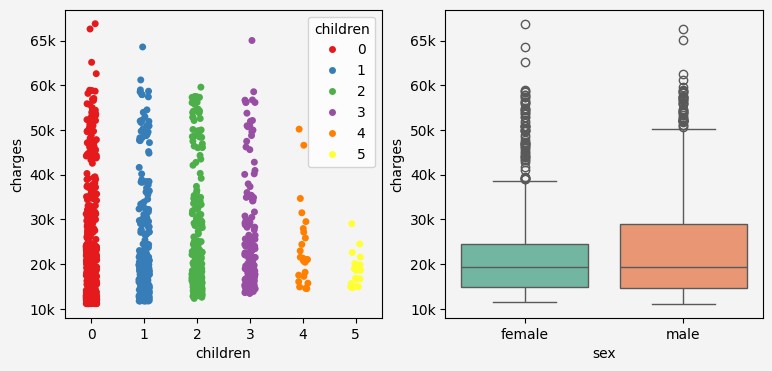

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

g1 = sns.stripplot(x='children', y='charges', data=insurance,
                   hue='children', palette='Set1', ax=axes[0])
g1.set_yticklabels(['0k', '10k', '20k', '30k', '40k', '50k', '60k', '65k'])
g1.set_facecolor('#f4f4f4')
g2 = sns.boxplot(x='sex', y='charges', data=insurance,
                 hue='sex', palette='Set2', ax=axes[1])
g2.set_yticklabels(['0k', '10k', '20k', '30k', '40k', '50k', '60k', '65k'])
g2.set_facecolor('#f4f4f4')

plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

To see the combined effect of all the features

<Figure size 1200x600 with 0 Axes>

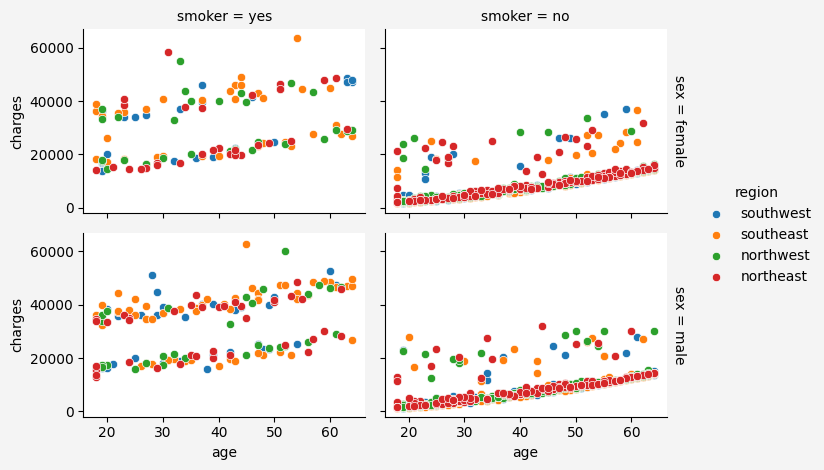

In [34]:
plt.figure(figsize=(12, 6))
g = sns.FacetGrid(insurance, col='smoker', row='sex',
                  hue='region', margin_titles=True, height=2.4, aspect=1.5)
g.map(sns.scatterplot, 'age', 'charges')

g.fig.patch.set_facecolor('#f4f4f4')
g.add_legend()
plt.show()

#### Information Gain
From the above plots, we can see that age feature stacks in three layers for charges. It maybe depending on other categorical features such as smoking status.


### Correlation Analysis  
#### Contineous Features

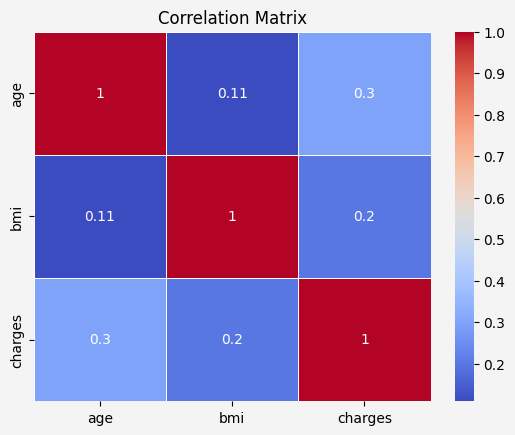

In [35]:
corr_matrix = insurance[['age', 'bmi', 'charges']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.gca().set_facecolor('#f4f4f4')
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

#### Categorical Features

In [36]:
import scipy.stats as st
anova_sex, p_value1 = st.f_oneway(
    insurance[insurance['sex'] == 'male']['charges'],
    insurance[insurance['sex'] == 'female']['charges']
)

anova_smoker, p_value2 = st.f_oneway(
    insurance[insurance['smoker'] == 'yes']['charges'],
    insurance[insurance['smoker'] == 'no']['charges']
)

anova_region, p_value3 = st.f_oneway(
    insurance[insurance['region'] == 'southwest']['charges'],
    insurance[insurance['region'] == 'southeast']['charges'],
    insurance[insurance['region'] == 'northwest']['charges'],
    insurance[insurance['region'] == 'northeast']['charges']
)

anova_children, p_value4 = st.f_oneway(
    insurance[insurance['children'] == 0]['charges'],
    insurance[insurance['children'] == 1]['charges'],
    insurance[insurance['children'] == 2]['charges'],
    insurance[insurance['children'] == 3]['charges'],
    insurance[insurance['children'] == 4]['charges'],
    insurance[insurance['children'] == 5]['charges']
)

anova_results = {
    'feature_name': ['sex', 'smoker', 'region', 'children'],
    'F-Statistic': [anova_sex, anova_smoker, anova_region, anova_children],
    'p-value': [p_value1, p_value2, p_value3, p_value4]
}

anova = pd.DataFrame(anova_results)
print(anova)

  feature_name  F-Statistic        p-value
0          sex     4.399702   3.613272e-02
1       smoker  2177.614868  8.271436e-283
2       region     2.969627   3.089336e-02
3     children     3.296920   5.785681e-03


#### Information Gain  
Both age and bmi features are positively correlated to charges with correlation coefficients $0.3$ and $0.2$, respectively. Since the $p$-values are less that $0.05$ , therefore, all the categorical features have impact on the target features.



### Pre-Processing  
#### Data Cleaning 

In [37]:
# Binary Encoding for the variables with two categories
from sklearn.preprocessing import LabelEncoder

insurance['male'] = pd.get_dummies(insurance.sex, dtype=int)['male']
insurance['smoke'] = pd.get_dummies(insurance.smoker, dtype=int)['yes']
insurance.drop(['sex', 'smoker'], axis=1, inplace=True)

label_encoder = LabelEncoder()
insurance['region'] = label_encoder.fit_transform(insurance['region'])

new_order = ['age', 'bmi', 'male', 'smoke', 'children', 'region', 'charges']
insurance = insurance[new_order]
insurance['charges'] = insurance['charges'].round(2)
insurance.sample(5)

,age,bmi,male,smoke,children,region,charges
278,59,31.790,1,0,2,2,12928.79
885,32,28.930,1,1,1,2,19719.69
26,63,23.085,0,0,0,0,14451.84
472,19,29.800,0,0,0,3,1744.46
308,58,34.865,1,0,0,0,11944.59


### Check for Multicollinearity  

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = insurance.drop('charges', axis=1)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(
    X.values, i) for i in range(len(X.columns))]
print(vif_data)

    feature        VIF
0       age   7.551348
1       bmi  10.371829
2      male   2.001061
3     smoke   1.256837
4  children   1.801245
5    region   2.924528


Since BMI and Age have higher values for the multicolinearity, therefore we adopt the following methods

### Feature Engineering

#### Interaction Term

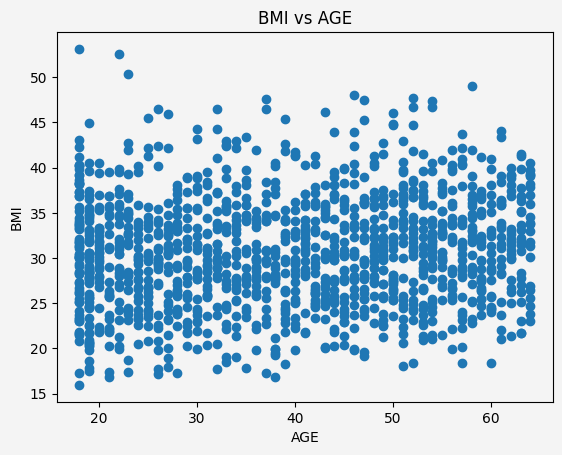

In [39]:
plt.scatter(insurance.age, insurance.bmi)
plt.xlabel('AGE')
plt.ylabel('BMI')
plt.title('BMI vs AGE')
plt.gca().set_facecolor('#f4f4f4')
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

Since there is no clear linear relationship or any pattern, the Multicollinearity issue can be ignored. However, older individuals with a certain BMI range might have different risks or costs associated with their health. We could explore interaction terms like age * bmi in our model to capture any potential synergistic effects.

In [40]:
insurance.insert(6, 'age_bmi', insurance.age*insurance.bmi)
insurance.insert(7, 'age_bmi_smoke', insurance.age_bmi*insurance.smoke)
insurance.sample(5, random_state=111)

,age,bmi,male,smoke,children,region,age_bmi,age_bmi_smoke,charges
1000,30,22.99,1,1,2,1,689.70,689.70,17361.77
53,36,34.43,1,1,0,2,1239.48,1239.48,37742.58
432,42,26.90,1,0,0,3,1129.80,0.00,5969.72
162,54,39.60,1,0,1,3,2138.40,0.00,10450.55
1020,51,37.00,1,0,0,3,1887.00,0.00,8798.59


### Data Splitting

In [41]:
from sklearn.model_selection import train_test_split
X = insurance.drop('charges', axis=1)
y = insurance['charges'].to_frame()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

### Standardization  

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

conts_features = ['age', 'bmi', 'age_bmi']
categ_features = ['male', 'smoke', 'children', 'region']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), conts_features)
    ],
    remainder='passthrough'
)
X_train_sc = preprocessor.fit_transform(X_train)
X_test_sc = preprocessor.fit(X_test)

# Model  
## Modeling Approaches  

We consider the following models  

1. **Baseline model:** Assumption that the `charges` variable can be modeled with the mean value of this `charges` variable.  
   $$ 
   \text{charges}=\mathbb{E}[\text{charges}]+\xi
   $$
2. **Linear Regression with `age-bmi-smoke` interaction**  
   $$
    \text{charges}=\beta_0+\beta_1 (\text{age\_bmi})+\beta_2 (\text{male})+\beta_3 (\text{smoke})+\beta_4 (\text{children})+\beta_5 (\text{region})+\beta_6 (\text{age-bmi-smoke})+\xi
   $$  

3. **K-Neighbor Regression**  
   
   $k$ NN using all the original features

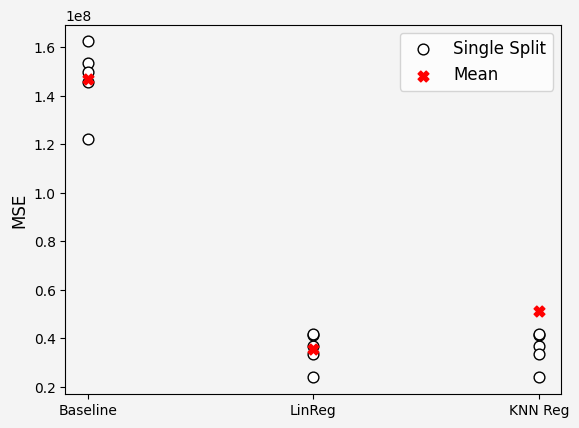

In [43]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

kfold = KFold(n_splits=5, shuffle=True, random_state=111)

mses = np.zeros((3, 5))

k = 10

for i, (train_index, test_index) in enumerate(kfold.split(X_train_sc)):
    X_train_sc_train = X_train_sc[train_index]
    X_train_sc_holdout = X_train_sc[test_index]

    y_train_train = y_train.iloc[train_index]
    y_train_holdout = y_train.iloc[test_index]

    pred0 = y_train_train.charges.mean()*np.ones(len(test_index))

    model1 = LinearRegression()
    model2 = KNeighborsRegressor(k)

    model1.fit(X_train_sc_train[:, 2:], y_train_train)
    model2.fit(X_train_sc_train[:, :6], y_train_train)

    pred1 = model1.predict(X_train_sc_holdout[:, 2:])
    pred2 = model2.predict(X_train_sc_holdout[:, :6])

    mses[0, i] = mean_squared_error(y_train_holdout, pred0)
    mses[1, i] = mean_squared_error(y_train_holdout, pred1)
    mses[2, i] = mean_squared_error(y_train_holdout, pred2)

plt.scatter(np.zeros(5), mses[0, :], s=60, c='white',
            edgecolors='black', label='Single Split')
plt.scatter(np.ones(5), mses[1, :], s=60, c='white', edgecolors='black')
plt.scatter(2*np.ones(5), mses[1, :], s=60, c='white', edgecolors='black')
plt.scatter([0, 1, 2], np.mean(mses, axis=1),
            s=60, c='r', marker='X', label='Mean')
plt.legend(loc='upper right', fontsize=12)
plt.xticks([0, 1, 2], ['Baseline', 'LinReg', 'KNN Reg'])
plt.yticks(fontsize=10)
plt.ylabel('MSE', fontsize=12)
plt.gca().set_facecolor('#f4f4f4')
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

In [44]:
print(np.mean(np.sqrt(mses), axis=1))
print('\n')
print('Minimum RMSE={} \n Model {}'.format(
    min(np.mean(np.sqrt(mses), axis=1)), np.argmin(np.mean(np.sqrt(mses), axis=1))))

[12101.66177575  5938.57275531  7120.2471585 ]


Minimum RMSE=5938.5727553087745 
 Model 1


## Final Model 

In [46]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
data = pd.read_csv('insurance.csv')


class FeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        X['male'] = pd.get_dummies(X.sex, dtype=int)['male']
        X['smoke'] = pd.get_dummies(X.smoker, dtype=int)['yes']

        label_encoding = LabelEncoder()
        X['region'] = label_encoding.fit_transform(X['region'])

        X['age_bmi'] = X['age'] * X['bmi']
        X['age_bmi_smoke'] = X['age'] * X['bmi'] * X['smoke']

        X = X.drop(['age', 'bmi', 'smoker', 'sex'], axis=1)
        return X


data = pd.read_csv('insurance.csv')
data['charges'] = data['charges'].round(2)

X = data.drop('charges', axis=1)
y = data['charges']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age_bmi', 'age_bmi_smoke']),
    ],
    remainder='passthrough'
)

pipe = Pipeline(
    steps=[
        ('feature_engineering', FeatureEngineering()),
        ('preprocess', preprocessor),
        ('model', LinearRegression())
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=111, shuffle=True)
pipe.fit(X_train, y_train)


pickle.dump(pipe, open('linreg.pkl', 'wb'))

## Model Validation 

### Root Mean Squared Error (RMSE)

In [47]:
train_prediction = pipe.predict(X_train)
test_prediction = pipe.predict(X_test)

print("Training set RMSE:",
      np.round(np.sqrt(mean_squared_error(train_prediction, y_train)))
      )
print("Test set RMSE:",
      np.round(np.sqrt(mean_squared_error(test_prediction, y_test)))
      )

Training set RMSE: 5853.0
Test set RMSE: 5600.0


### R-Squared ($R^2$)  

In [48]:
from sklearn.metrics import r2_score
y_pred = pipe.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.4f}')

R-squared: 0.8008


### Residuals

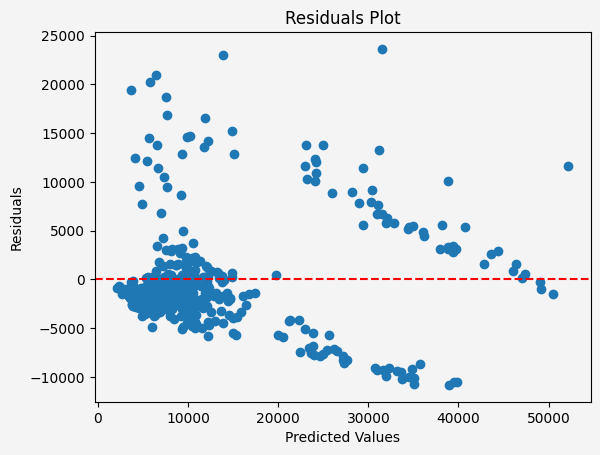

In [49]:
res = y_test - y_pred

plt.scatter(y_pred, res)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.gca().set_facecolor('#f4f4f4')
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

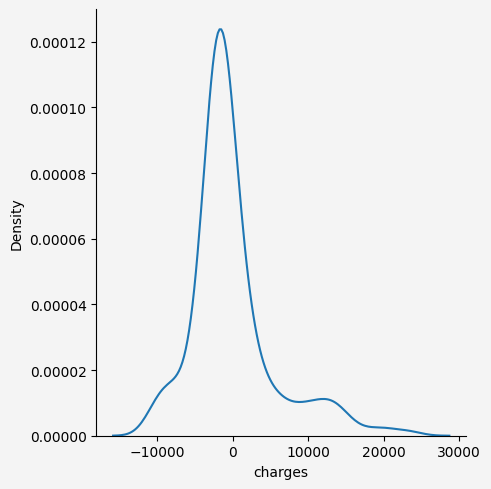

In [50]:
sns.displot(res, kind='kde')
plt.gca().set_facecolor('#f4f4f4')
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()